In [1]:
# Dependencies
import numpy as np
import pandas as pd
import pprint
import requests
import pymongo
from IPython.display import HTML

from datetime import datetime


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
%matplotlib inline

from sqlalchemy import create_engine
from sqlalchemy.types import String, Date, DateTime, Float

In [2]:
plt.rcParams['figure.dpi'] = 150 # default for me was 75


In [3]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [4]:
# Define database and collection
db = client.diablo_db
collection = db.d3forum

In [5]:

post_dict = list(db['d3forum2'].find())
post_dict[0]

{'_id': ObjectId('5be65932c1d80b798639f43d'),
 'title': 'Weapon Elemental Damage?',
 'posted_at': datetime.datetime(2015, 7, 5, 4, 19),
 'reply_sentiment': [{'neg': 0.204,
   'neu': 0.705,
   'pos': 0.09,
   'compound': -0.871},
  {'neg': 0.186, 'neu': 0.752, 'pos': 0.062, 'compound': -0.743}],
 'text': ["I'm kinda confused on this. I've read a few threads with differing views and I'm just ?????<br/>I'm literally a question mark right now. My final form is here and it is a giant question mark.<br/><br/>Let's say  I have a cold build on a Wizard. I have a weapon with XXX Cold Damage and a piece of armor with + XXX% Cold Damage. <br/><br/>Does the Armor increase the Weapon's elemental damage?<br/>Do Wizards even benefit from Elemental Damage on Weapons like that?",
  'Elemental damage on a weapon has no effect on anything other than that ONE wizard passive but it is explicitly stated in said passive.  Aside from that it has no bearing at all.Also, you\'re the reason why we literally no l

In [6]:
frames = []
for row, topic in enumerate(post_dict):
    if row % 10000 == 0:
        print(row)
    array = []
    for counter, post in enumerate(post_dict[row]['text']):
        try:
            array.append([post_dict[row]['text'][counter], post_dict[row]['reply_sentiment'][counter]['pos'],
                   post_dict[row]['reply_sentiment'][counter]['neg'], post_dict[row]['reply_sentiment'][counter]['neu'],
                  post_dict[row]['reply_sentiment'][counter]['compound']])
        
        except IndexError as e:
            print(e, counter)
    titles = []
    [titles.append(post_dict[row]['title']) for result in array]
    post_time = []
    [post_time.append(post_dict[row]['posted_at']) for result in array]

    tuples = list(zip(titles, post_time, list(range(len(post_dict[row]['text'])))))
    index = pd.MultiIndex.from_tuples(tuples, names=['title', 'post_time', 'reply #'])

    df = pd.DataFrame(array, index=index, columns=
                      ['Text', 'pos', 'neg', 'neu', 'compound'])
    frames.append(df)
result = pd.concat(frames)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000


In [7]:
result.head()

Text  \
title                                      post_time           reply #                                                      
Weapon Elemental Damage?                   2015-07-05 04:19:00 0        I'm kinda confused on this. I've read a few th...   
                                                               1        Elemental damage on a weapon has no effect on ...   
Personal solo Season 3 objective: Complete 2015-07-04 22:19:00 0        My main is a DH, I wasted so much time just pl...   
                                                               1                 I think about you when I brush my teeth.   
                                                               2                               I hope you floss my friend   

                                                                          pos  \
title                                      post_time           reply #          
Weapon Elemental Damage?                   2015-07-05 04:19:00 0        0.090   
                                                               1        0.062   
Personal solo Season 3 objective: Complete 2015-07-04 22:19:00 0        0.071   
                                                               1        0.000   
                                                               2        0.670   

                                                                          neg  \
title                                      post_time           reply #          
Weapon Elemental Damage?                   2015-07-05 04:19:00 0        0.204   
                                                               1        0.186   
Personal solo Season 3 objective: Complete 2015-07-04 22:19:00 0        0.069   
                                                               1        0.000   
                                                               2        0.000   

                                                                          neu  \
title                                      post_time           reply #          
Weapon Elemental Damage?                   2015-07-05 04:19:00 0        0.705   
                                                               1        0.752   
Personal solo Season 3 objective: Complete 2015-07-04 22:19:00 0        0.859   
                                                               1        1.000   
                                                               2        0.330   

                                                                        compound  
title                                      post_time           reply #            
Weapon Elemental Damage?                   2015-07-05 04:19:00 0         -0.8710  
                                                               1         -0.7430  
Personal solo Season 3 objective: Complete 2015-07-04 22:19:00 0          0.3176  
                                                               1          0.0000  
                                                               2          0.7269

In [8]:
result.sort_values(by='compound', ascending=True)

,,,Text,pos,neg,neu,compound
title,post_time,reply #,,,,,
"HEY BASHIOK, or any community manager",2012-06-17 05:08:00,0,Tell the head of the company to hire a couple ...,0.009,0.941,0.050,-1.0000
"Humble suggestions, Blizzard please read.",2012-06-08 05:53:00,0,"Hello Diablo III team, I'd like to provide som...",0.083,0.194,0.724,-1.0000
D3 Class - Nightshade (Idea for next expansion),2014-03-16 14:49:00,0,"I'm not the best writer for fan content, but w...",0.082,0.265,0.653,-1.0000
D3 Expansion Class: Necromancer (My version),2012-11-17 18:50:00,0,So I was reading another thread about adding a...,0.044,0.262,0.694,-1.0000
Patch 1.0.4 notes,2012-08-21 18:13:00,0,Diablo III Patch 1.0.4 – v.1.0.4.11327GeneralN...,0.113,0.194,0.692,-1.0000
Introducing the Ninja,2012-09-18 22:37:00,0,Hey there. I was bored and was thinking of di...,0.105,0.302,0.593,-1.0000
My take on a D3 Necromancer,2013-11-04 09:05:00,0,This is going to be a very long and fairly in-...,0.064,0.338,0.598,-1.0000
Custom Class The Sentinel,2012-08-28 21:30:00,0,Sentinel is an Elite Iron Wolf Mercenary. The ...,0.071,0.260,0.669,-1.0000
[Class-Suggestion] The Shadow-Priest,2016-06-07 14:38:00,0,The Shadow-Priest Prologue: Dear Diablo III-Co...,0.068,0.334,0.598,-1.0000


In [9]:
plot_df = result[['pos', 'neg', 'neu', 'compound', 'Text']]
plot_df.index = plot_df.index.droplevel(level=[0,2])
plot_df = plot_df.reset_index(drop=False)
plot_df['month-year'] = plot_df.post_time.dt.to_period('M')
plot_df.head()

,post_time,pos,neg,neu,compound,Text,month-year
0,2015-07-05 04:19:00,0.090,0.204,0.705,-0.8710,I'm kinda confused on this. I've read a few th...,2015-07
1,2015-07-05 04:19:00,0.062,0.186,0.752,-0.7430,Elemental damage on a weapon has no effect on ...,2015-07
2,2015-07-04 22:19:00,0.071,0.069,0.859,0.3176,"My main is a DH, I wasted so much time just pl...",2015-07
3,2015-07-04 22:19:00,0.000,0.000,1.000,0.0000,I think about you when I brush my teeth.,2015-07
4,2015-07-04 22:19:00,0.670,0.000,0.330,0.7269,I hope you floss my friend,2015-07


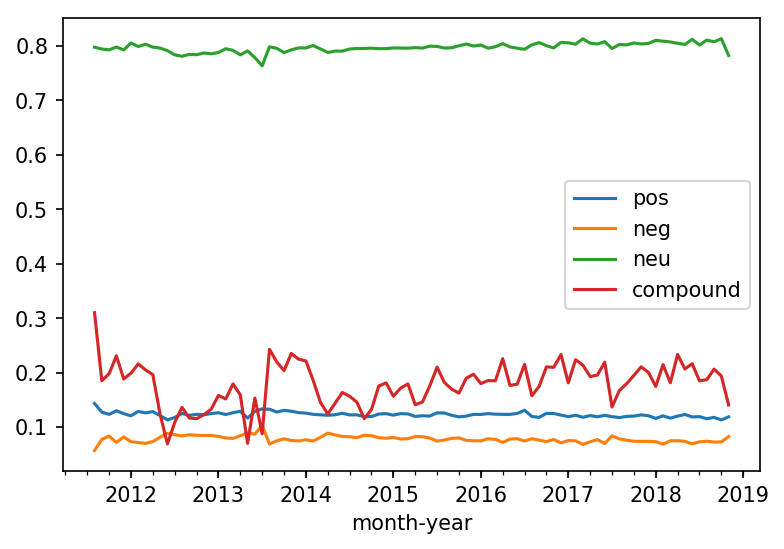

In [10]:
timed_averages = plot_df.groupby(by=['month-year']).mean()
timed_averages.plot()

In [11]:
# timed_averages = plot_df.groupby(by=[plot_df.index.month, plot_df.index.day,  plot_df.index.year]).mean()
# timed_averages.index = timed_averages.index.set_names(names=['Month', 'Day', 'Year'])
timed_averages = timed_averages.reset_index(drop=False)
timed_averages.head()


,month-year,pos,neg,neu,compound
0,2011-08,0.143266,0.056978,0.797607,0.310088
1,2011-09,0.127484,0.077443,0.794368,0.185115
2,2011-10,0.123325,0.083449,0.792783,0.197937
3,2011-11,0.129948,0.071763,0.798005,0.230841
4,2011-12,0.124616,0.081787,0.792753,0.188356


In [ ]:
skull_mask = np.array(Image.open("/home/xanderroy/Documents/ToxicBlizzard/step0001.jpg"))



In [12]:
monthly_words = plot_df.groupby(['month-year']).agg(lambda x: x.mean() if x.dtype=='float64' else "".join(x))
monthly_words.index = monthly_words.index.strftime('%Y-%m')
monthly_words = monthly_words.reset_index(drop=False)
monthly_words.head()

,index,pos,neg,neu,compound,Text
0,2011-08,0.143266,0.056978,0.797607,0.310088,Welcome to the General Discussion forum! This ...
1,2011-09,0.127484,0.077443,0.794368,0.185115,"Oh, I'm sorry -- if the problem is that you ar..."
2,2011-10,0.123325,0.083449,0.792783,0.197937,I am curious if there are any plans of impleme...
3,2011-11,0.129948,0.071763,0.798005,0.230841,I want to be able to name mine. I know it sou...
4,2011-12,0.124616,0.081787,0.792753,0.188356,Has this been implemented yet for Battle.Net?J...


In [ ]:
# this is for making ONE wordcloud
stopwords = set(STOPWORDS)
stopwords.update(['now', 'will', 'come', 'or', 'to', 'and', 
            'the', 'be', 'i', 'it', 'in', 'of', 'with', 'this', 'if', 'make', 'even', 'PMPosted'
            'so', 'but', 'that', 'so', 'all', 'a', 'game', 'because', 'one', 'AMPosted'])

wordcloud = WordCloud(stopwords=stopwords, mask=skull_mask, scale=2, height=500,
                     relative_scaling=.5, max_words=300, 
                     contour_width=2, contour_color='red',
                      color_func=lambda *args, **kwargs: "white").generate("Loading")

#     plt.figure(figsize=(6, 3), dpi=400)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
date =  row[0].strftime('%Y-%m')
filename = f'{date}cloud'
plt.tight_layout()
plt.title = (f'{date}')
plt.savefig(f'/home/xanderroy/Documents/homework/Webpage/Homepage/{filename}',dpi=250,  transparent=True)
print(filename)
plt.show()

In [ ]:
wordcloud?

In [13]:
engine = create_engine('sqlite:///diablodb')
connection = engine.raw_connection()
cursor = connection.cursor()
timed_averages.to_sql('monthyear',  engine, chunksize=1000,
              dtype={'month-year': Text, 'pos': Float, 'neu': Float,
                     'neg': Float , 'compound': Float})

NameError: name 'Text' is not defined

In [ ]:

stopwords = set(STOPWORDS)
stopwords.update(['now', 'will', 'come', 'or', 'to', 'and', 
            'the', 'be', 'i', 'it', 'in', 'of', 'with', 'this', 'if', 'make', 'even', 'PMPosted'
            'so', 'but', 'that', 'so', 'all', 'a', 'game', 'because', 'one', 'AMPosted'])
count = 0
for row in monthly_words.iterrows():
    count += 1
    wordcloud = WordCloud(stopwords=stopwords, mask=skull_mask, scale=2, height=500,
                          font_path="fonts/diablo_h.ttf",
                         background_color="black", relative_scaling=.5, max_words=300, 
                         contour_width=0.1, contour_color='red').generate(row[1].Text)

#     plt.figure(figsize=(6, 3), dpi=400)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    date =  row[0]
    filename = f'{count}cloud'
    plt.tight_layout()
    plt.title = (f'{date}')
    plt.savefig(f'/home/xanderroy/Documents/Diablo-Flask/static/images/{filename}',dpi=250,  transparent=True)
    print(filename)

In [ ]:
wordcloud?


In [ ]:
# "June 28, 2008 at 12:18pm" : announce date
# May 2011: Blizzard started the company-wide alpha testing phase
# May 15th, 2011: announced that the beta would start by the end of the third quarter 
# August 1st, 2011: first preview of their beta build and 
# September 1st, 2011 : they relaunched their community site.
# September 6th, 2011 : the Friends and Family beta started. 
# September 20th, 2011 through May 1st, 2012.: closed beta
#     October 22, 2011: Open Beta Announced @ blizzcon
        
    

# Febuary 2012: Announced D3 Would not launch in first quarter of 2012
# April 20-23, 2012 :Open Beta Weekend event 
    
# May 15, 2012: Release Date
# May 28, 2012: FTC raid on South Korea office
# June 15, 2012: French consumers group UFC Que Choisir announced that it had received 1,500 complaints in four days regarding connectivity issues 
# June 2012: full refunds offered
# May 31, 2012: Eurogamer Article denounced Error 37 ongoing 
# #credit SalParadise   https://us.battle.net/forums/en/d3/topic/6413082176
# 2012/05/15: Game Released
# 2012/05/15: First Level 60
# 2012/05/15: First working bot
# 2012/05/18: Monks group "Serenity" rune nerfed (hotfix)
# 2012/05/19: First NA Inferno Diablo kill w/ screenshot (potentially not first)
# 2012/05/22: DH Smokescreen, Wizard Invincibility nerfed (hotfix)
# 2012/05/29: 1.0.2a released
# 2012/06/07: 1.0.2b released
# 2012/06/08: Ashes give less gold, Multiplayer Mob Damage nerfed (hotfix)
# 2012/06/19: 1.0.3 released (attack speed reduced 50%, no MF for breakables, high iLvl items drop in A1, affix pool for high iLvl items increased)
# 2012/06/28: High iLvl drop rates increased from initial 1.0.3 values
# 2012/07/03: Prevented double-drops from elite packs
# 2012/07/28: Removed wizard invulnerability, barbarian regen exploit
# 2012/08/21: 1.0.4 released
# August 15, 2012 starter edition released
# August 2013: Ps4 develeopment announced
# November 8, 2013: Blizzcon
# February 25, 2014, patch 2.0.1 was released, 
# March 25, 2014: the Reaper of Souls
# May 2014: Diablo III: Ultimate Evil Edition Announced (August 19th release)
# November 7, 2014: Blizzcon
# November 6, 2015: Blizzcon
# November 4 2016 :Blizzcon Annouunce darkening of tristam event
# June 27, 2017 : ps4, xbone release Eternal Collection
# November 3, 2017: Blizzcon
# November 2, 2018: switch release Eternaal Collection
# November 2, 2018: Immortal Is Announced
    
# Patch 2.6.1 — October 2017
# Patch 2.6.0 — June 2017
# Patch 2.5.0 — March 2017
# Patch 2.4.3 — January 2017
# Patch 2.4.2 — August 2016
# Patch 2.4.1 — April 2016
# Patch 2.4 — January 2016
# Patch 2.3 — August 2015
# Patch 2.2 — April 2015
# Patch 2.1.2 — January 2015
# Patch 2.1.1 — September 2014
# Patch 2.1.0 — August 2014
# Patch 2.0.6 — June 2014
# Patch 2.0.5 — May 2014
# Patch 2.0.4 — April 2014
# Diablo 3 Reaper of Souls — March 2014
# Patch 2.0.3 — March 2014
# Patch 2.0.2 — March 2014
# Patch 2.0.1 — February 2014
# Patch 1.0.8 — May 2013
# Patch 1.0.7 — February 2013
# Patch 1.0.6 — November 2012
# Patch 1.0.5 — October 2012
# Patch 1.0.4 — August 2012
# Patch 1.0.3 — June 2012
# Patch 1.0.2 — June 2012
# Diablo 3 "Vanilla" — May 2012
# Patch 1.0.1 — May 2012



# Patch 2.6.1 — October 2017
# Class Set Revisions
# Skill Changes
# Item Revisions
# Patch 2.6.0 — June 2017
# Necromancer Character pack
# New Class: Necromancer
# New Set and Legendary Items
# New Cosmetics
# New Zones: Moors and Temple of the Firstborn
# New Zones: Fractured Realms (Realms of Fate)
# Challenge Rifts
# Patch 2.5.0 — March 2017
# Seasons on Console
# The Armory - Easy system for switching builds
# Crafting Mat Storage
# Primal Ancients - Perfectly rolled ancient items
# Changes to Legendaries, Set Items, Greater Rifts, Skills and more
# Patch 2.4.3 — January 2017
# 20th Anniversary Event
# 64-bit client and other hardware support
# Changes to Legendaries, Set Items, Elite Affixes, Skills, and more
# Patch 2.4.2 — August 2016
# New Difficulty Levels
# New and Updated Items
# UI Updates
# Adventure Mode Changes
# Patch 2.4.1 — April 2016
# Legendary Gem Updates
# New Cosmetic Items
# Patch 2.4 — January 2016
# VIDEO: What's New in Patch 2.4
# New: Greyhollow Island. Expanded: The Eternal Woods and Royal Quarters
# Revamped Set Items. New Legendaries
# Set Dungeons
# Empowered Rifts
# Action Combat
# Season Rebirth
# Revised Buff User Interface
# More Stash Space
# Patch 2.3 — August 2015
# VIDEO: What's New in Patch 2.3
# Kanai’s Cube
# Season Journey
# Torment 7-10
# Adventure Mode and Crafting Updates
# Ruins of Sescheron
# Combat Changes
# Patch 2.2 — April 2015
# New Bounties. Auto-crafting. Blood Shard cap
# New items, item and set changes
# Undocumented Changes
# Patch 2.1.2 — January 2015
# Some sets reworked
# Damage shield changes (e.g. cheat deaths, absorb shields, and % Damage Reduction)
# Ancient items
# New Treasure Goblins
# Patch 2.1.1 — September 2014
# Pet survivability
# Enchant jewelry cost reduced
# Undocumented Changes
# Patch 2.1.0 — August 2014
# VIDEO: What's New in Patch 2.1.0
# Combat Changes: Dexterity Change, Healing, 2h Weapons Buff, Charges
# New Game Mode: Seasons
# New Zones
# Greater Rifts, Legendary Gems
# Changes to Legendary Items
# Undocumented Changes
# Hotfixes on August 3, 2014
# Patch 2.0.6 — June 2014
# Unique crafting materials removed
# Several Monk changes
# Patch 2.0.5 — May 2014
# Skill balancing
# Undocumented Changes
# Patch 2.0.4 — April 2014
# Skill balancing
# Gem costs changes
# Undocumented Changes
# Diablo 3 Reaper of Souls — March 2014
# Crusader Class
# Level 70
# Act V
# Adventure Mode - Bounties, Nephalem Rifts, Blood Shard Gambling
# Mystic - Enchanting and Transmogrification
# New items/powers only for level 61+ characters.
# MORE INFO: Reaper of Souls Mega FAQ/Help Thread
# Patch 2.0.3 — March 2014
# Bug fixes
# Patch 2.0.2 — March 2014
# Bug fixes
# Patch 2.0.1 — February 2014
# Loot 2.0
# Class Changes: Barbarian, Demon Hunter, Monk, Witch Doctor, and Wizard
# Difficulty Changes
# Paragon 2.0
# Clans and Communities
# Reworked quest bonuses, hero statistics, and boss fights
# New/Changed Monster affixes and New/Changed Events
# Patch 1.0.8 — May 2013
# Increased Multiplayer Experience. Many Experience changes, Team Alerts
# Identify All. Queue up multiple crafts. Craft from stash materials.
# Game type tags
# Patch 1.0.7 — February 2013
# Brawling
# Demonic Essence for Bind on Account Crafting
# Marquise Gems
# Reflect changed
# Patch 1.0.6 — November 2012
# Bugfixes
# Patch 1.0.5 — October 2012
# Infernal Machine and Hellfire Rings
# Monster Power
# Patch 1.0.4 — August 2012
# Paragon Levels
# Magic Find no longer averaged on team
# New Legendary Items
# No Enrage Timer for Champs and Rares.
# Invulnerable Minion removed. Shielding changed.
# Patch 1.0.3 — June 2012
# Attack Speed bonus nerf.
# Patch 1.0.2 — June 2012
# Real Money Auction House
# Diablo 3 "Vanilla" — May 2012
# Patch 1.0.1 — May 2012
# Diablo 3 "Vanilla" is released.